In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [67]:
x = np.linspace(1, 20, 100)

In [68]:
x[:5]

array([1.        , 1.19191919, 1.38383838, 1.57575758, 1.76767677])

In [69]:
# y = 5x + 20
y = [np.random.uniform(5, 2) * n + 20for n in x]
y[:5]

[24.361003230802243,
 25.079992889793846,
 26.471815232711222,
 24.638751813859688,
 28.541404877727956]

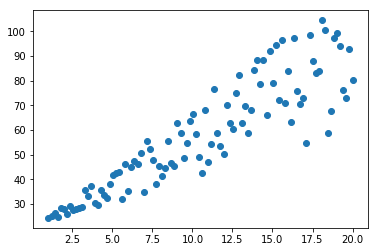

In [70]:
plt.scatter(x,y);

In [71]:
x = sm.add_constant(x)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [73]:
X_train.shape, len(y_train)

((67, 2), 67)

In [74]:
X_train[:10]

array([[ 1.        ,  6.37373737],
       [ 1.        , 18.84848485],
       [ 1.        ,  1.95959596],
       [ 1.        , 13.66666667],
       [ 1.        , 13.47474747],
       [ 1.        ,  7.71717172],
       [ 1.        ,  4.07070707],
       [ 1.        , 10.4040404 ],
       [ 1.        ,  7.52525253],
       [ 1.        ,  2.34343434]])

In [75]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [76]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     243.2
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           1.19e-23
Time:                        01:23:51   Log-Likelihood:                -247.75
No. Observations:                  67   AIC:                             499.5
Df Residuals:                      65   BIC:                             503.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.3371      2.644      8.069      0.000      16.056      26.618
x1             3.4093      0.219     15.596      0.000       2.973       3.846
==============================================================================
Omnibus:                        0.695   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.707   Jarque-Bera (JB):                0.224
Skew:                          -0.073   Prob(JB):                        0.894
Kurtosis:                       3.243   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
results.params

array([21.33710634,  3.40934471])

In [78]:
y_hat = results.predict(X_test)

In [79]:
r2_score(y_test, y_hat)

0.8329474254555439

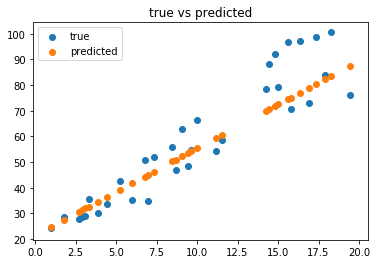

In [93]:
plt.scatter(X_test[:,1], y_test, label='true')
plt.scatter(X_test[:,1], y_hat, label='predicted')
plt.title('true vs predicted')
plt.legend()